In [1]:
# 2 color graph coloring problem circuit
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
# Define the graph by giving the ends of each edge

g = [(0,1), (1,2), (1,3), (2,4), (3,4)]

nNodes=max(max(g))+1
nEdges=len(g)
nodes = list(range(nNodes))
print(nodes)

[0, 1, 2, 3, 4]


In [3]:
# Create a Quantum Circuit
q = QuantumRegister(nNodes+nEdges)
c = ClassicalRegister(nNodes)
qc = QuantumCircuit(q,c)


In [4]:
# Add the gates to the circuit for each edge in the graph
qc.h(nodes)
k = nNodes
for edge in g:
    i = edge[0]
    j = edge[1]
    qc.ccx(i,j,k)
    qc.x(i)
    qc.x(j)
    qc.ccx(i,j,k)
    qc.x(i)
    qc.x(j)
    qc.cx(k,j)
    qc.barrier()
    k += 1


In [5]:
# measure all the input qubits
for i in nodes:
    qc.measure(i,c[i])


{'10010': 509, '01101': 515}


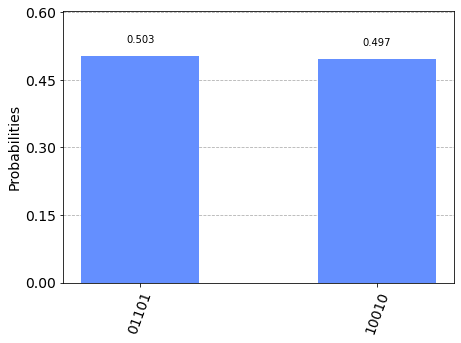

In [6]:
# Use Aer's qasm_simulator
backend_qasm_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_qasm_sim, shots=1024)

# display the results
result_qasm_sim = job_sim.result()
print(result_qasm_sim.get_counts())
plot_histogram(result_qasm_sim.get_counts())


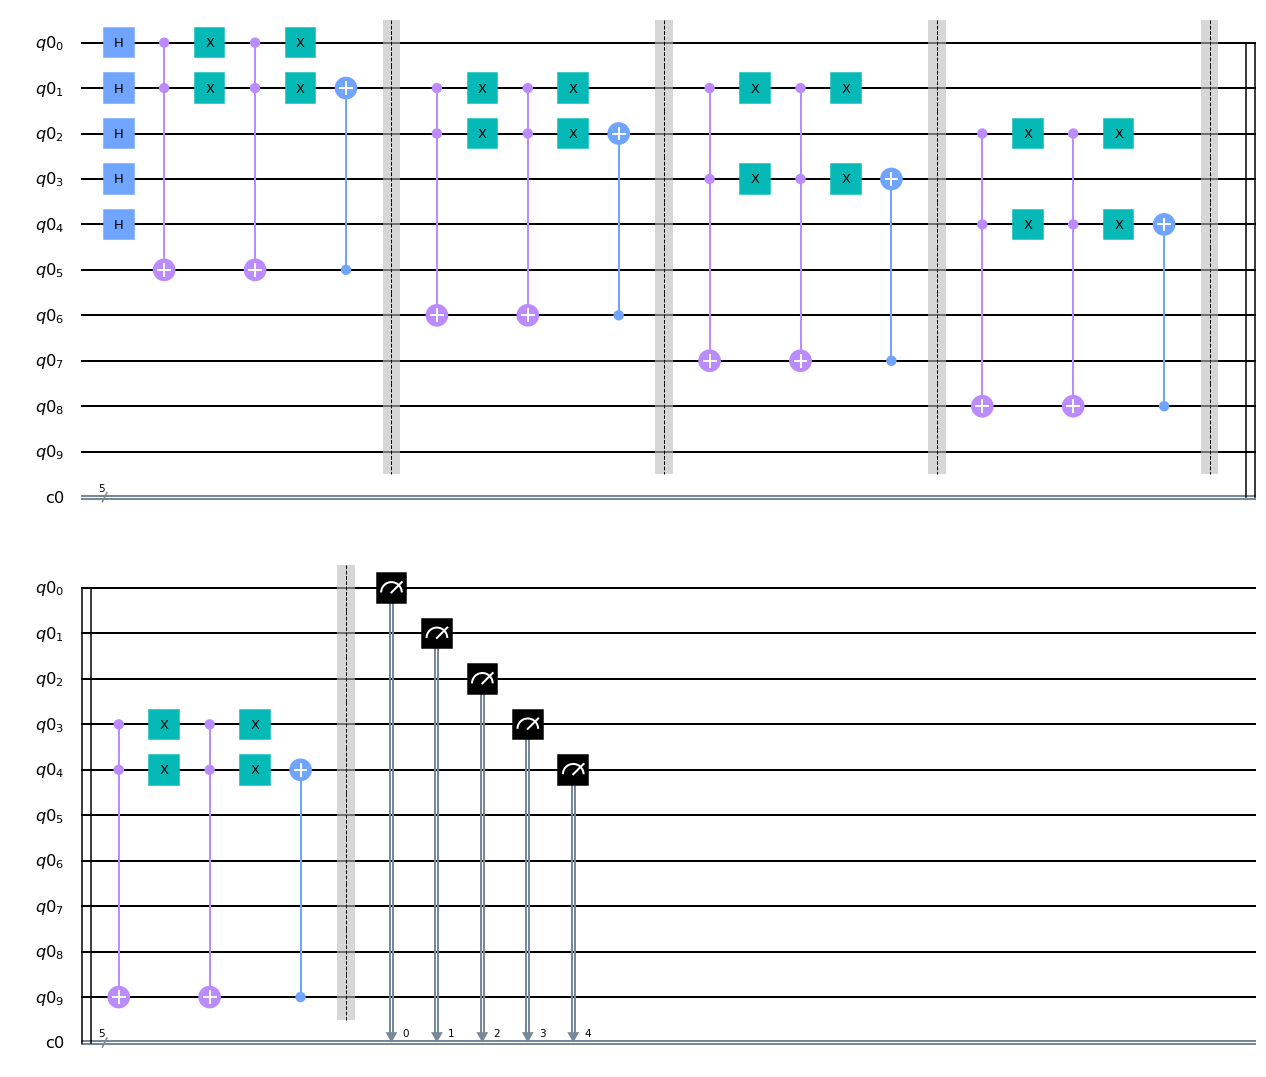

In [7]:
#--------------- Drawing
qc.draw(output='mpl')